# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.107961e+01     8.877479e+00
 * time: 0.002254962921142578
     1     2.938845e+01     4.381279e+00
 * time: 0.009546995162963867
     2     1.994167e+01     3.820687e+00
 * time: 0.018052101135253906
     3     1.405027e+01     2.969793e+00
 * time: 0.026151180267333984
     4     1.281238e+01     3.071999e+00
 * time: 0.03225207328796387
     5     1.189279e+01     3.036910e+00
 * time: 0.03845715522766113
     6     1.053978e+01     2.812000e+00
 * time: 0.04490017890930176
     7     9.399267e+00     1.696933e+00
 * time: 0.051213979721069336
     8     8.780028e+00     8.779483e-01
 * time: 0.09197711944580078
     9     8.533997e+00     6.326771e-01
 * time: 0.09815716743469238
    10     8.449559e+00     1.333018e+00
 * time: 0.10269308090209961
    11     8.448374e+00     1.036669e+00
 * time: 0.10724210739135742
    12     8.387817e+00     6.838448e-01
 * time: 0.11142706871032715
    13     8.313166e+00     5.825308e-01
 * 

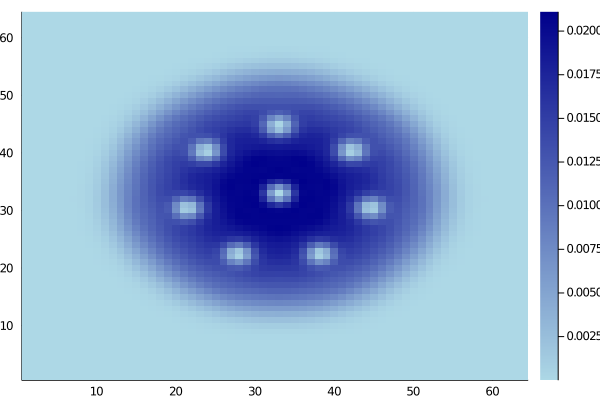

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)